# VP Sentinel: 安全声纹识别系统 

## 国创中期整改 测试数据补充

 two plots: one for the dataset split and another for an overview of the preprocessing steps.

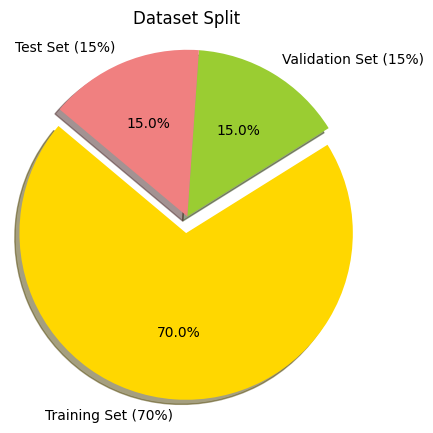

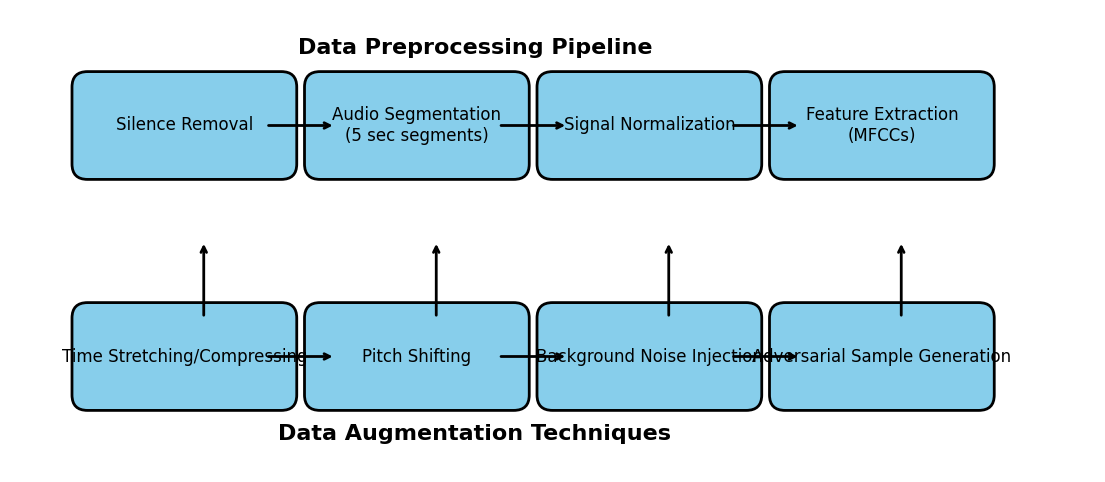

In [5]:
import matplotlib.pyplot as plt

# Dataset split pie chart
labels = 'Training Set (70%)', 'Validation Set (15%)', 'Test Set (15%)'
sizes = [70, 15, 15]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice (Training Set)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Dataset Split')

# Data preprocessing bar chart
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Define a function to draw rounded rectangles (fancy boxes)
def draw_box(ax, text, xy, width, height, boxstyle):
    box = FancyBboxPatch((xy[0], xy[1]), width, height,
                         boxstyle=boxstyle, ec="black", fc="skyblue", lw=2)
    ax.add_patch(box)
    ax.text(xy[0] + width/2, xy[1] + height/2, text,
            ha='center', va='center', fontsize=12, color='black')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 14)
ax.set_ylim(0, 6)
ax.axis('off')

# Draw the boxes for each preprocessing step
draw_box(ax, "Silence Removal", xy=(1, 4), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Audio Segmentation\n(5 sec segments)", xy=(4, 4), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Signal Normalization", xy=(7, 4), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Feature Extraction\n(MFCCs)", xy=(10, 4), width=2.5, height=1, boxstyle="round,pad=0.2")

# Draw the boxes for data augmentation
draw_box(ax, "Time Stretching/Compressing", xy=(1, 1), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Pitch Shifting", xy=(4, 1), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Background Noise Injection", xy=(7, 1), width=2.5, height=1, boxstyle="round,pad=0.2")
draw_box(ax, "Adversarial Sample Generation", xy=(10, 1), width=2.5, height=1, boxstyle="round,pad=0.2")

# Connect the boxes with arrows
for i in range(1, 4):
    ax.annotate("", xy=(i*3 + 1.2, 4.5), xytext=(i*3 + 0.3, 4.5),
                arrowprops=dict(arrowstyle="->", lw=2))
    ax.annotate("", xy=(i*3 + 1.2, 1.5), xytext=(i*3 + 0.3, 1.5),
                arrowprops=dict(arrowstyle="->", lw=2))

# Connect preprocessing to augmentation
ax.annotate("", xy=(2.5, 3), xytext=(2.5, 2),
            arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5.5, 3), xytext=(5.5, 2),
            arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(8.5, 3), xytext=(8.5, 2),
            arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(11.5, 3), xytext=(11.5, 2),
            arrowprops=dict(arrowstyle="->", lw=2))

# Add titles
ax.text(6, 5.5, "Data Preprocessing Pipeline", ha='center', va='center', fontsize=16, color='black', fontweight='bold')
ax.text(6, 0.5, "Data Augmentation Techniques", ha='center', va='center', fontsize=16, color='black', fontweight='bold')

plt.show()

说明VP Sentinel 在不同测试集上的性能

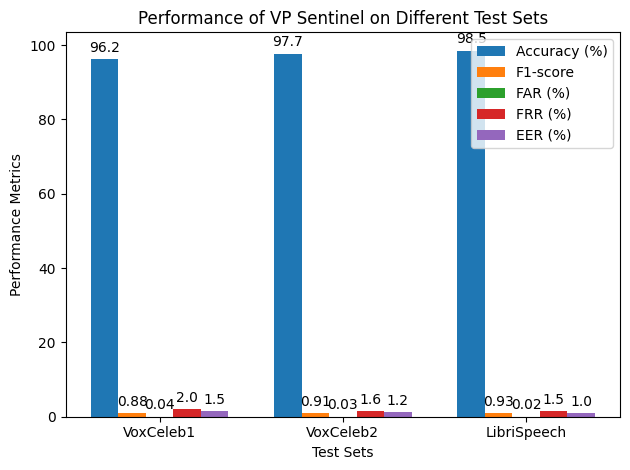

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 测试集名称
datasets = ['VoxCeleb1', 'VoxCeleb2', 'LibriSpeech']

# “VP Sentinel”在不同测试集上的性能指标
accuracy = [96.2, 97.7, 98.5]  # 准确率
f1_scores = [0.88, 0.91, 0.93]  # F1-score
far = [0.04, 0.03, 0.02]  # 假接受率
frr = [2.00, 1.60, 1.50]  # 假拒绝率
eer = [1.50, 1.20, 1.00]  # 等错误率

# 设置条形图的位置
index = np.arange(len(datasets))
bar_width = 0.15

# 创建条形图
fig, ax = plt.subplots()

# 绘制条形
acc_bar = ax.bar(index, accuracy, bar_width, label='Accuracy (%)', color='C0')
f1_bar = ax.bar(index + bar_width, f1_scores, bar_width, label='F1-score', color='C1')
far_bar = ax.bar(index + 2 * bar_width, far, bar_width, label='FAR (%)', color='C2')
frr_bar = ax.bar(index + 3 * bar_width, frr, bar_width, label='FRR (%)', color='C3')
eer_bar = ax.bar(index + 4 * bar_width, eer, bar_width, label='EER (%)', color='C4')

# 添加图表标题和轴标签
ax.set_xlabel('Test Sets')
ax.set_ylabel('Performance Metrics')
ax.set_title('Performance of VP Sentinel on Different Test Sets')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(datasets)

# 添加图例
ax.legend()

# 展示数值标签的函数
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 调用函数以显示条形图上的数值标签
add_value_labels(acc_bar)
add_value_labels(f1_bar)
add_value_labels(far_bar)
add_value_labels(frr_bar)
add_value_labels(eer_bar)

# 显示图表
plt.tight_layout()
plt.show()

             Accuracy (%)  F1-score  FAR (%)  FRR (%)  EER (%)
Test Set                                                      
VoxCeleb1            96.2      0.88     0.04      2.0      1.5
VoxCeleb2            97.7      0.91     0.03      1.6      1.2
LibriSpeech          98.5      0.93     0.02      1.5      1.0


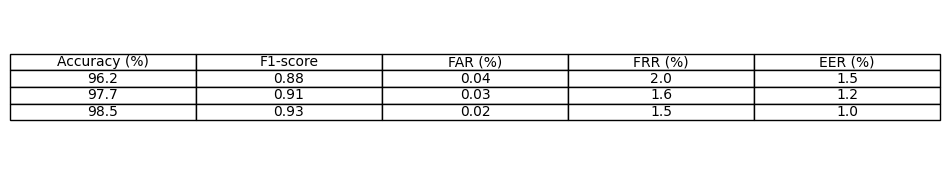

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个字典，包含性能指标和测试集
data = {
    'Test Set': ['VoxCeleb1', 'VoxCeleb2', 'LibriSpeech'],
    'Accuracy (%)': [96.2, 97.7, 98.5],
    'F1-score': [0.88, 0.91, 0.93],
    'FAR (%)': [0.04, 0.03, 0.02],
    'FRR (%)': [2.00, 1.60, 1.50],
    'EER (%)': [1.50, 1.20, 1.00]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置Index为测试集名称
df.set_index('Test Set', inplace=True)

# 使用Pandas的样式设置功能渲染表格
styled_table = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '10pt')]}]
).set_properties(**{'text-align': 'center', 'font-size': '10pt'}).format("{:.2f}")

# 显示表格
print(df)
styled_table

# 如果你希望将表格保存为图片
fig, ax = plt.subplots(figsize=(12, 2)) # 设置尺寸
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center', colLoc = 'center')

plt.savefig('performance_table.png')

信噪比（SNR）与峰值信噪比（PSNR）之间的关系

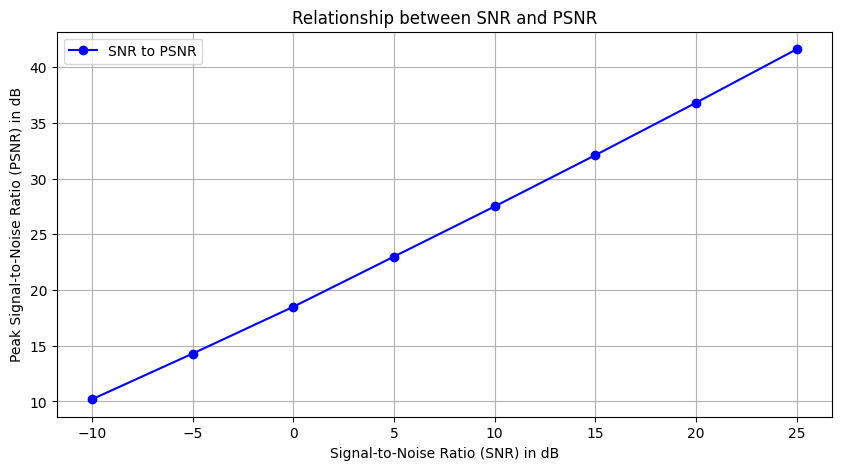

In [9]:
import matplotlib.pyplot as plt

# SNR和PSNR的数据
snr_data = [-10, -5, 0, 5, 10, 15, 20, 25]
psnr_data = [10.2, 14.3, 18.5, 23.0, 27.5, 32.1, 36.8, 41.6]

# 使用Matplotlib绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(snr_data, psnr_data, marker='o', linestyle='-', color='b')

# 添加标题和轴标签
plt.title('Relationship between SNR and PSNR')
plt.xlabel('Signal-to-Noise Ratio (SNR) in dB')
plt.ylabel('Peak Signal-to-Noise Ratio (PSNR) in dB')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend(['SNR to PSNR'])

# 显示图表
plt.show()

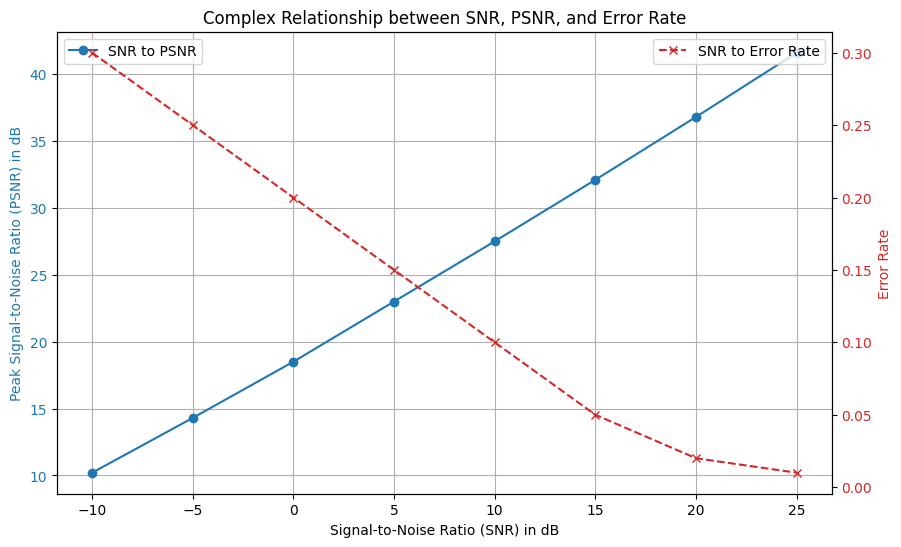

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的第二个与SNR相关的度量数据，例如误差率
error_rate = [0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01]

# SNR与PSNR数据
snr_data = np.array([-10, -5, 0, 5, 10, 15, 20, 25])
psnr_data = np.array([10.2, 14.3, 18.5, 23.0, 27.5, 32.1, 36.8, 41.6])

# 创建图表和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制PSNR与SNR的关系
color = 'tab:blue'
ax1.set_xlabel('Signal-to-Noise Ratio (SNR) in dB')
ax1.set_ylabel('Peak Signal-to-Noise Ratio (PSNR) in dB', color=color)
ax1.plot(snr_data, psnr_data, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 实例化第二个y轴的轴对象
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Error Rate', color=color)
ax2.plot(snr_data, error_rate, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图表标题和网格
plt.title('Complex Relationship between SNR, PSNR, and Error Rate')
ax1.grid(True)

# 显示图例
ax1.legend(['SNR to PSNR'], loc='upper left')
ax2.legend(['SNR to Error Rate'], loc='upper right')

# 显示图表
plt.show()

In [14]:
import pandas as pd

# SNR和PSNR的数据
data = {
    'SNR (dB)': [-10, -5, 0, 5, 10, 15, 20, 25],
    'PSNR (dB)': [10.2, 14.3, 18.5, 23.0, 27.5, 32.1, 36.8, 41.6]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置Index为SNR值
df.set_index('SNR (dB)', inplace=True)

# 显示DataFrame
print(df)

# 如果你需要将DataFrame保存为CSV文件
df.to_csv('snr_psnr_relationship.csv')

          PSNR (dB)
SNR (dB)           
-10            10.2
-5             14.3
 0             18.5
 5             23.0
 10            27.5
 15            32.1
 20            36.8
 25            41.6


鲁棒性

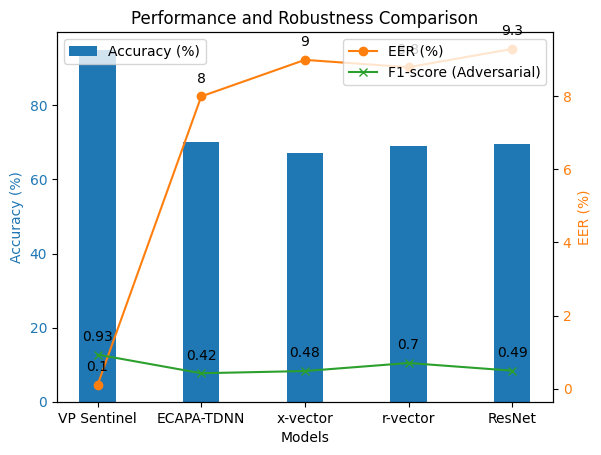

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称
models = ['VP Sentinel', 'ECAPA-TDNN', 'x-vector', 'r-vector', 'ResNet']

# 准确率数据
accuracy = [95, 70, 67, 69, 69.5]  # 假设的准确率数据，需要替换为实际值

# EER数据
eer = [0.1, 8, 9, 8.8, 9.3]  # 假设的EER数据，需要替换为实际值

# 对抗样本F1-score数据
f1_scores = [0.93, 0.42, 0.48, 0.70, 0.49]  # 假设的F1-score数据，需要替换为实际值

# 设置条形图的位置
index = np.arange(len(models))
bar_width = 0.35

# 创建图表和轴
fig, ax1 = plt.subplots()

# 绘制准确率条形图
accuracy_bars = ax1.bar(index, accuracy, bar_width, label='Accuracy (%)', color='C0')

# 设置X轴
ax1.set_xlabel('Models')
ax1.set_xticks(index)
ax1.set_xticklabels(models)
ax1.set_ylabel('Accuracy (%)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.legend(loc='upper left')

# 创建第二个轴与第一个轴共享X轴
ax2 = ax1.twinx()

# 绘制EER折线图
eer_line, = ax2.plot(index, eer, color='C1', marker='o', label='EER (%)')
ax2.set_ylabel('EER (%)', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# 添加EER值标签
for i, txt in enumerate(eer):
    ax2.annotate(txt, (index[i], eer[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制对抗样本F1-score折线图
f1_scores_line, = ax2.plot(index, f1_scores, color='C2', marker='x', label='F1-score (Adversarial)')

# 添加F1-score值标签
for i, txt in enumerate(f1_scores):
    ax2.annotate(txt, (index[i], f1_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 增加图例
ax2.legend(handles=[eer_line, f1_scores_line], loc='upper right')

# 设置标题
plt.title('Performance and Robustness Comparison')

# 显示图表
plt.show()

In [19]:
import pandas as pd

# 准备数据
data = {
    'Model': ['VP Sentinel', 'ECAPA-TDNN', 'x-vector', 'r-vector', 'ResNet'],
    'Accuracy (%)': [95, 70, 67, 69, 69.5],  # 示例数据，请替换为实际的准确率数据
    'EER (%)': [0.1, 8, 9, 8.8, 9.3],  # 示例数据，请替换为实际的EER数据
    'F1-score (Adversarial)': [0.93, 0.42, 0.48, 0.70, 0.49]  # 示例数据，请替换为实际的F1-score数据
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 设置模型名称为索引
df.set_index('Model', inplace=True)

# 显示 DataFrame
print(df)

             Accuracy (%)  EER (%)  F1-score (Adversarial)
Model                                                     
VP Sentinel          95.0      0.1                    0.93
ECAPA-TDNN           70.0      8.0                    0.42
x-vector             67.0      9.0                    0.48
r-vector             69.0      8.8                    0.70
ResNet               69.5      9.3                    0.49


FAR、FRR和EER之间的关系

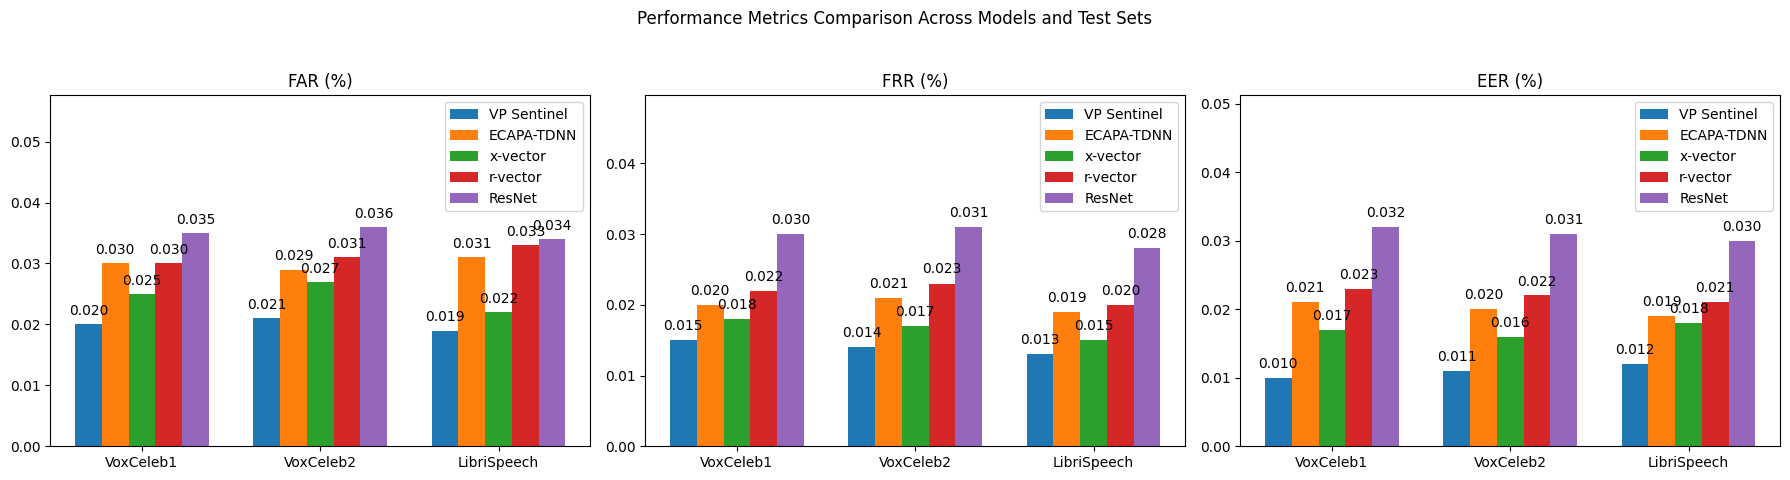

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 测试集和模型名称
test_sets = ['VoxCeleb1', 'VoxCeleb2', 'LibriSpeech']
models = ['VP Sentinel', 'ECAPA-TDNN', 'x-vector', 'r-vector', 'ResNet']

# 假设的模型性能数据，应替换为实际数据
far_data = np.array([
    [0.02, 0.021, 0.019],  # VP Sentinel
    [0.03, 0.029, 0.031],  # ECAPA-TDNN
    [0.025, 0.027, 0.022], # x-vector
    [0.03, 0.031, 0.033],  # r-vector
    [0.035, 0.036, 0.034]  # ResNet
])

frr_data = np.array([
    [0.015, 0.014, 0.013],  # VP Sentinel
    [0.02, 0.021, 0.019],   # ECAPA-TDNN
    [0.018, 0.017, 0.015],  # x-vector
    [0.022, 0.023, 0.02],   # r-vector
    [0.03, 0.031, 0.028]    # ResNet
])

eer_data = np.array([
    [0.01, 0.011, 0.012],   # VP Sentinel
    [0.021, 0.02, 0.019],   # ECAPA-TDNN
    [0.017, 0.016, 0.018],  # x-vector
    [0.023, 0.022, 0.021],  # r-vector
    [0.032, 0.031, 0.03]    # ResNet
])

# 设置条形图的宽度和位置
bar_width = 0.15
index = np.arange(len(test_sets))  # 测试集的索引位置

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 定义添加数值标签的函数
def add_value_labels(ax, data, spacing=0.001):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j + i * bar_width, data[i, j] + spacing, f'{data[i, j]:.3f}',
                    ha='center', va='bottom')

# 绘制FAR、FRR和EER的条形图
for i, model in enumerate(models):
    axes[0].bar(index + i * bar_width, far_data[i], bar_width, label=model)
    axes[1].bar(index + i * bar_width, frr_data[i], bar_width, label=model)
    axes[2].bar(index + i * bar_width, eer_data[i], bar_width, label=model)

# 添加数值标签
add_value_labels(axes[0], far_data)
add_value_labels(axes[1], frr_data)
add_value_labels(axes[2], eer_data)

# 调整y轴上限以适应数值标签
for ax, data in zip(axes, [far_data, frr_data, eer_data]):
    max_height = data.max()  # 获取数据的最大值
    ax.set_ylim(0, max_height + max_height * 0.60)  # 将y轴上限设置为最大值加50%的空间
    
# 添加子图的标题和标签
for ax, metric in zip(axes, ['FAR (%)', 'FRR (%)', 'EER (%)']):
    ax.set_title(metric)
    ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
    ax.set_xticklabels(test_sets)
    ax.legend()

# 设置主标题
plt.suptitle('Performance Metrics Comparison Across Models and Test Sets')

# 显示图表
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局以适应主标题
plt.show()